In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Import

In [2]:
acc = pd.read_csv('./../Data_phone/pali-otthon/Accelerometer.csv',sep=',',header=0,names=['time','seconds_elapsed','acc_z','acc_y','acc_x'])
gyr = pd.read_csv('./../Data_phone/pali-otthon/Gyroscope.csv',sep=',',header=0,names=['time','seconds_elapsed','gyr_z','gyr_y','gyr_x'])
loc = pd.read_csv('./../Data_phone/pali-otthon/Location.csv',sep=',')
#loc2 = pd.read_csv('./../Data_phone/pe-otthon_2/Location.csv',sep=',')  # for GPS coordinate comparison

In [3]:
acc.head()

,time,seconds_elapsed,acc_z,acc_y,acc_x
0,1709479874816941300,0.030941,0.003924,-0.323628,-0.246644
1,1709479874826998300,0.040998,-0.285720,0.284784,-0.068226
2,1709479874837056500,0.051056,0.692226,-0.024066,-0.644851
3,1709479874847114200,0.061114,-0.363028,-0.022247,-0.183344
4,1709479874857171200,0.071171,0.338663,0.214720,0.074267


In [4]:
gyr.head()

,time,seconds_elapsed,gyr_z,gyr_y,gyr_x
0,1709479874816941300,0.030941,-0.013459,0.080146,-0.007117
1,1709479874826998300,0.040998,-0.023030,0.055037,0.004746
2,1709479874837056500,0.051056,-0.013440,0.075295,-0.001381
3,1709479874847114200,0.061114,-0.014847,0.065443,0.003200
4,1709479874857171200,0.071171,-0.026248,0.010992,0.013625


In [5]:
loc.head()

,time,seconds_elapsed,altitude,speedAccuracy,bearingAccuracy,latitude,altitudeAboveMeanSeaLevel,bearing,horizontalAccuracy,verticalAccuracy,longitude,speed
0,1709479873865227300,-0.920773,246.856041,2.292595,4.807578,46.900018,202.266041,191.146108,20.684499,9.131487,16.857607,18.467590
1,1709479874815228200,0.029228,246.584823,2.269564,4.680996,46.899864,201.994823,192.365542,18.287537,9.352351,16.857550,18.467590
2,1709479875764985000,0.978985,246.320597,1.646187,3.692223,46.899699,201.730597,192.944233,15.822907,8.329897,16.857502,18.466200
3,1709479876714516200,1.928516,245.907159,1.659869,3.492573,46.899538,201.317159,193.357769,14.448981,7.156504,16.857457,18.466200
4,1709479877664355600,2.878355,245.818161,1.718456,3.723896,46.899374,201.228160,191.726008,13.294145,7.142480,16.857412,18.908745


# Cleaning

In [6]:
df = pd.concat([acc, gyr[['gyr_z','gyr_y','gyr_x']]], axis=1)
df.head()

,time,seconds_elapsed,acc_z,acc_y,acc_x,gyr_z,gyr_y,gyr_x
0,1709479874816941300,0.030941,0.003924,-0.323628,-0.246644,-0.013459,0.080146,-0.007117
1,1709479874826998300,0.040998,-0.285720,0.284784,-0.068226,-0.023030,0.055037,0.004746
2,1709479874837056500,0.051056,0.692226,-0.024066,-0.644851,-0.013440,0.075295,-0.001381
3,1709479874847114200,0.061114,-0.363028,-0.022247,-0.183344,-0.014847,0.065443,0.003200
4,1709479874857171200,0.071171,0.338663,0.214720,0.074267,-0.026248,0.010992,0.013625


- Interpolate the location data

In [7]:
loc_new = pd.DataFrame()
fp = loc['seconds_elapsed'] #interpolaciohoz: ismert adatpontok helye
x = df['seconds_elapsed'] #interpolaciohoz: uj adatpontok helye

for j in ['latitude','longitude','speed']:
    xp = loc[j] #interpolaciohoz: eredeti y ertekek
    loc_new[j] = np.interp(x, fp, xp) 

loc_new.head()

,latitude,longitude,speed
0,46.899863,16.857550,18.467588
1,46.899862,16.857549,18.467573
2,46.899860,16.857549,18.467558
3,46.899858,16.857548,18.467544
4,46.899856,16.857548,18.467529


In [8]:
df = pd.concat([df, loc_new], axis=1)
df.head()

,time,seconds_elapsed,acc_z,acc_y,acc_x,gyr_z,gyr_y,gyr_x,latitude,longitude,speed
0,1709479874816941300,0.030941,0.003924,-0.323628,-0.246644,-0.013459,0.080146,-0.007117,46.899863,16.857550,18.467588
1,1709479874826998300,0.040998,-0.285720,0.284784,-0.068226,-0.023030,0.055037,0.004746,46.899862,16.857549,18.467573
2,1709479874837056500,0.051056,0.692226,-0.024066,-0.644851,-0.013440,0.075295,-0.001381,46.899860,16.857549,18.467558
3,1709479874847114200,0.061114,-0.363028,-0.022247,-0.183344,-0.014847,0.065443,0.003200,46.899858,16.857548,18.467544
4,1709479874857171200,0.071171,0.338663,0.214720,0.074267,-0.026248,0.010992,0.013625,46.899856,16.857548,18.467529


In [9]:
df.rename(columns={"latitude":"lat", "longitude": "lon"},inplace=True)
df.head()

,time,seconds_elapsed,acc_z,acc_y,acc_x,gyr_z,gyr_y,gyr_x,lat,lon,speed
0,1709479874816941300,0.030941,0.003924,-0.323628,-0.246644,-0.013459,0.080146,-0.007117,46.899863,16.857550,18.467588
1,1709479874826998300,0.040998,-0.285720,0.284784,-0.068226,-0.023030,0.055037,0.004746,46.899862,16.857549,18.467573
2,1709479874837056500,0.051056,0.692226,-0.024066,-0.644851,-0.013440,0.075295,-0.001381,46.899860,16.857549,18.467558
3,1709479874847114200,0.061114,-0.363028,-0.022247,-0.183344,-0.014847,0.065443,0.003200,46.899858,16.857548,18.467544
4,1709479874857171200,0.071171,0.338663,0.214720,0.074267,-0.026248,0.010992,0.013625,46.899856,16.857548,18.467529


- Scaling

In [10]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

In [11]:
scaler_mms = MinMaxScaler()
scaler_mms.fit(df[['acc_z','acc_y','acc_x','gyr_z','gyr_y','gyr_x']])
scaled_mms = scaler_mms.transform(df[['acc_z','acc_y','acc_x','gyr_z','gyr_y','gyr_x']])
df_scaled = pd.DataFrame(scaled_mms, index=df.index, columns=['acc_z','acc_y','acc_x','gyr_z','gyr_y','gyr_x'])

In [12]:
df_scaled['lat'] = df['lat']
df_scaled['lon'] = df['lon']
df_scaled['speed'] = df['speed']
df_scaled['time'] = df['time']
df_scaled['seconds_elapsed'] = df['seconds_elapsed']
#df_scaled['abs_time'] = df['time']
df_scaled.head()

,acc_z,acc_y,acc_x,gyr_z,gyr_y,gyr_x,lat,lon,speed,time,seconds_elapsed
0,0.396099,0.364361,0.465309,0.535791,0.639964,0.447846,46.899863,16.857550,18.467588,1709479874816941300,0.030941
1,0.377129,0.442900,0.489948,0.527270,0.602785,0.472696,46.899862,16.857549,18.467573,1709479874826998300,0.040998
2,0.441177,0.403031,0.410317,0.535808,0.632780,0.459862,46.899860,16.857549,18.467558,1709479874837056500,0.051056
3,0.372066,0.403266,0.474050,0.534556,0.618193,0.469459,46.899858,16.857548,18.467544,1709479874847114200,0.061114
4,0.418021,0.433856,0.509626,0.524405,0.537569,0.491298,46.899856,16.857548,18.467529,1709479874857171200,0.071171


- Spatial resampling

In [13]:
dDist = []
for j in np.arange(2,len(df)):
    d = abs(np.arccos(np.cos(np.deg2rad(90-df_scaled['lat'].loc[j-1])) * np.cos(np.deg2rad(90-df_scaled['lat'].loc[j])) + np.sin(np.deg2rad(90-df_scaled['lat'].loc[j-1])) * np.sin(np.deg2rad(90-df_scaled['lat'].loc[j]))) * np.cos(np.deg2rad(df_scaled['lon'].loc[j-1]-df_scaled['lon'].loc[j])) * 3958.76);
    dDist.append(d)
df_dDist = pd.DataFrame(dDist)
df_dDist.fillna(0,inplace=True) #remove the NaN values, introduced from the above calculation
df_dDist.isna().value_counts()

C:\Users\Admin\AppData\Local\Temp\ipykernel_15540\2906762954.py:3: RuntimeWarning: invalid value encountered in arccos
  d = abs(np.arccos(np.cos(np.deg2rad(90-df_scaled['lat'].loc[j-1])) * np.cos(np.deg2rad(90-df_scaled['lat'].loc[j])) + np.sin(np.deg2rad(90-df_scaled['lat'].loc[j-1])) * np.sin(np.deg2rad(90-df_scaled['lat'].loc[j]))) * np.cos(np.deg2rad(df_scaled['lon'].loc[j-1]-df_scaled['lon'].loc[j])) * 3958.76);


0    
False    78375
Name: count, dtype: int64

In [14]:
summed = np.cumsum(df_dDist.to_numpy())*1000   #calculated the total travelles distance by cumsum function
uniqe_indexes = np.unique(summed,return_index=True)
#uniqe_indexes
#xp[uniqe_indexes[1]]
x = np.arange(0,max(summed),0.2)

# Then we use again the interp function to convert the time domain to the spatial domain
df_spatial = pd.DataFrame()
for j in ['acc_z','acc_y','acc_x','gyr_z','gyr_y','gyr_x','lat','lon','speed','time','seconds_elapsed']:
    xp = df_scaled[j]
    df_spatial[j] = np.interp(x,uniqe_indexes[0],xp[uniqe_indexes[1]])

# Spatial resample done!

- Check the results

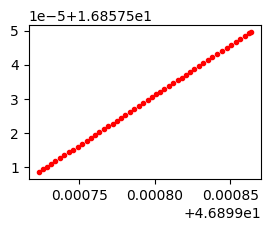

In [15]:
plt.figure(figsize=(3,2))
plt.plot(df_spatial['lat'][:50],df_spatial['lon'][:50],'r.')

# Analysis

### PCA

In [16]:
from sklearn.decomposition import PCA

<Axes: >

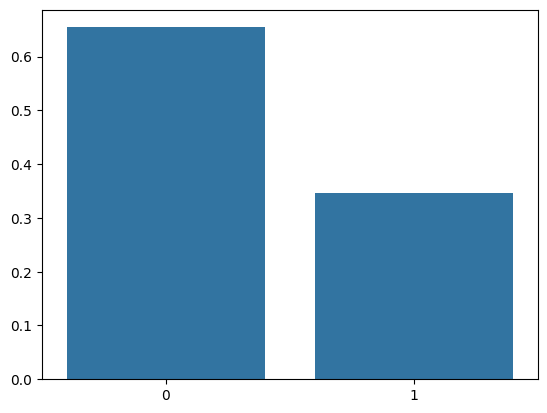

In [17]:
pca = PCA()
pca.fit(df_spatial[['acc_z','gyr_x']]) #gyr_z and acc_y has been removed, because these had a great negative effect from maneuvers
df_pca = pca.transform(df_spatial[['acc_z','gyr_x']]) #,'acc_x','gyr_y',

# Good accuracy with: acc_z, gyr_x, 
sns.barplot(x=np.arange(0,len(pca.explained_variance_ratio_)),y=pca.explained_variance_ratio_)

### K-Means clustering

In [19]:
from sklearn.cluster import AgglomerativeClustering
import plotly.graph_objects as go
import plotly.express as px

In [20]:
model = AgglomerativeClustering(n_clusters=4)
cluster_labels = model.fit_predict(df_pca)
#cluster_labels = model.fit_predict(df_spatial[['acc_z','acc_y','acc_x','gyr_y','gyr_x']])

In [61]:
"""
# Moving average folter
def moving_average(a, n=50):
    ret = np.cumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n

filtered = moving_average(cluster_labels)
"""
"""
# with Golay-Savitzky filter
from scipy.signal import savgol_filter

filter = savgol_filter(cluster_labels, 50, 2)
"""

# Rolling with most dominant filter

# Define the size of each rolling window
window_size = 20


# Apply rolling window and find the most dominant value within each window
df_spatial['dominant_value'] = df_spatial['label'].rolling(window=window_size).apply(lambda x: x.value_counts().idxmax() if len(x) > 0 else None)

# Drop any rows with NaN values (due to incomplete windows)
#dominant_values.dropna(inplace=True)
df_spatial['dominant_value'].fillna(value=2,inplace=True)

C:\Users\Admin\AppData\Local\Temp\ipykernel_15540\3230049138.py:28: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [63]:
fig = px.scatter_mapbox(lat=df_spatial['lat'], lon=df_spatial['lon'], color= df_spatial['dominant_value'] ,zoom=10, width=500, height=500 , color_continuous_scale=px.colors.diverging.RdYlGn) #, hover_name="City", hover_data=["State", "Population"], color_discrete_sequence=["fuchsia"], zoom=3, height=300)

#fig.update_geos(scope='europe')
fig.update_geos(fitbounds="locations")
fig.update_layout(height=300, margin={"r":0,"t":0,"l":0,"b":0})
fig.update_layout(mapbox_style="open-street-map")

#fig.show()

In [64]:
# Save the results

df_labelled = pd.concat([df_spatial, df_pca], axis=1)
# Assuming df is your DataFrame
new_column_names = {
    0: 'pca_0',
    1: 'pca_1'
}
df_labelled = df_labelled.rename(columns=new_column_names)
"""
df_labelled = pd.concat([df_labelled,pd.DataFrame(cluster_labels)], axis=1)

new_column_names = {
    0: 'label'
}
df_labelled = df_labelled.rename(columns=new_column_names)
"""
df_labelled.head()

,acc_z,acc_y,acc_x,gyr_z,gyr_y,gyr_x,lat,lon,speed,time,seconds_elapsed,label,dominant_value,pca_0,pca_1
0,0.396099,0.364361,0.465309,0.535791,0.639964,0.447846,46.899863,16.857550,18.467588,1.709480e+18,0.030941,2,2.0,-0.012199,-0.006000
1,0.385150,0.409691,0.479529,0.530873,0.618506,0.462189,46.899862,16.857549,18.467579,1.709480e+18,0.036746,2,2.0,0.003285,-0.015263
2,0.422354,0.403095,0.427675,0.535467,0.628807,0.462476,46.899859,16.857548,18.467554,1.709480e+18,0.053796,2,2.0,-0.000620,0.021736
3,0.416531,0.432864,0.508472,0.524735,0.540184,0.490589,46.899856,16.857548,18.467529,1.709480e+18,0.070845,0,2.0,0.027970,0.019117
4,0.391624,0.386718,0.471475,0.534621,0.563140,0.492585,46.899853,16.857547,18.467504,1.709480e+18,0.087895,0,2.0,0.032759,-0.005407


In [65]:
df_labelled.to_csv('labelled_data.csv',index=False)

In [67]:
df_spatial.shape

(26631, 13)

# Test new ideas

<Axes: xlabel='seconds_elapsed', ylabel='gyr_z'>

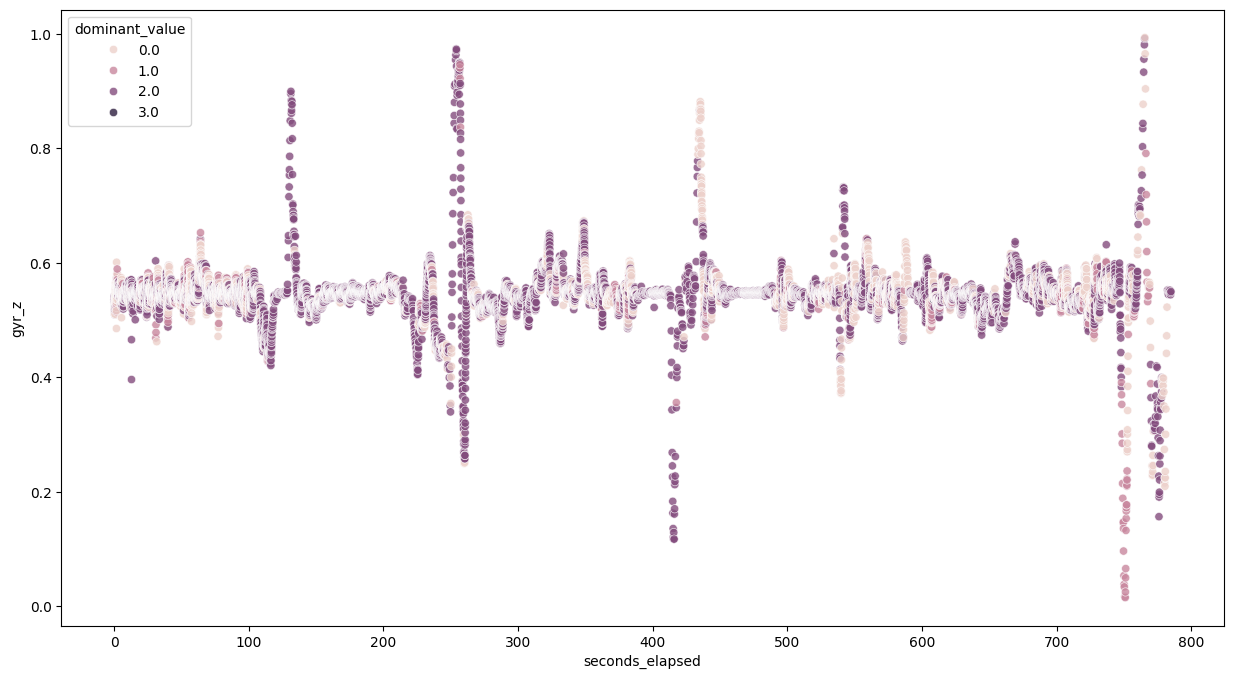

In [66]:
# Which variable is relevant for the manoevre effect?
plt.figure(figsize=(15,8))
sns.scatterplot(data=df_spatial,x='seconds_elapsed',y='gyr_z',hue=df_spatial['dominant_value'], alpha=0.8)

### Get street name for coordinates

In [74]:
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter

In [86]:
test=pd.DataFrame()
#test["coordinates"] = df["lat"][:10].apply(str)+ " , " +df["lon"][:10].apply(str)
test["coordinates"] = df_spatial["lat"].apply(str)+ " , " +df_spatial["lon"].apply(str)
test = test.iloc[::1000, :]
test

,coordinates
0,"46.899863336758465 , 16.857549591594424"
1000,"46.89702374045539 , 16.856702411899096"
2000,"46.89416078908764 , 16.855718541607146"
3000,"46.89127658673035 , 16.854729692009375"
4000,"46.88840777938082 , 16.853760747389867"
5000,"46.88553467987722 , 16.853033797067763"
6000,"46.88266445503228 , 16.85312384706165"
7000,"46.87979702613402 , 16.853209364544103"
8000,"46.87694379424091 , 16.85329956455545"
9000,"46.874005635679566 , 16.85322456653806"


In [84]:
"""
# Define a custom function to apply
def custom_apply(row):
    print(row)
    if row.index % 3 == 0:  # Check if index is divisible by 3
        # Apply your operation here
        return 'fine'
    else:
        return row  # Return the row unchanged if not every third row

# Apply the custom function to every row
test = df_spatial['acc_x'].apply(custom_apply)
"""


"\n# Define a custom function to apply\ndef custom_apply(row):\n    print(row)\n    if row.index % 3 == 0:  # Check if index is divisible by 3\n        # Apply your operation here\n        return 'fine'\n    else:\n        return row  # Return the row unchanged if not every third row\n\n# Apply the custom function to every row\ntest = df_spatial['acc_x'].apply(custom_apply)\n"

In [87]:
geolocator = Nominatim(user_agent="Nancy Amandi", timeout= 10) #or user agent is https://nominatim.openstreetmap.org/reverse?lat=<value>&lon=<value>&<params>
rgeocode = RateLimiter(geolocator.reverse, min_delay_seconds=0.1)
test["location"] = test["coordinates"].apply(rgeocode)

In [88]:
test

,coordinates,location
0,"46.899863336758465 , 16.857549591594424","(74, Egervár, Zalaegerszegi járás, Zala vármeg..."
1000,"46.89702374045539 , 16.856702411899096","(74, Egervár, Zalaegerszegi járás, Zala vármeg..."
2000,"46.89416078908764 , 16.855718541607146","(74, Egervár, Zalaegerszegi járás, Zala vármeg..."
3000,"46.89127658673035 , 16.854729692009375","(74, Egervár, Zalaegerszegi járás, Zala vármeg..."
4000,"46.88840777938082 , 16.853760747389867","(74, Egervár, Zalaegerszegi járás, Zala vármeg..."
5000,"46.88553467987722 , 16.853033797067763","(74, Zalaegerszeg, Zalaegerszegi járás, Zala v..."
6000,"46.88266445503228 , 16.85312384706165","(74, Zalaegerszeg, Zalaegerszegi járás, Zala v..."
7000,"46.87979702613402 , 16.853209364544103","(74, Zalaegerszeg, Zalaegerszegi járás, Zala v..."
8000,"46.87694379424091 , 16.85329956455545","(74, Zalaegerszeg, Zalaegerszegi járás, Zala v..."
9000,"46.874005635679566 , 16.85322456653806","(74;76, Nekeresd, Zalaegerszeg, Zalaegerszegi ..."


In [85]:
df_spatial.shape

(26631, 13)

In [95]:
test_concat = pd.concat([df_spatial,test],axis=1)
test_concat['location'].fillna(method='ffill',inplace=True)
test_concat

C:\Users\Admin\AppData\Local\Temp\ipykernel_15540\2944365928.py:2: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



C:\Users\Admin\AppData\Local\Temp\ipykernel_15540\2944365928.py:2: FutureWarning:

Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.



,acc_z,acc_y,acc_x,gyr_z,gyr_y,gyr_x,lat,lon,speed,time,seconds_elapsed,label,dominant_value,coordinates,location
0,0.396099,0.364361,0.465309,0.535791,0.639964,0.447846,46.899863,16.857550,18.467588,1.709480e+18,0.030941,2,2.0,"46.899863336758465 , 16.857549591594424","(74, Egervár, Zalaegerszegi járás, Zala vármeg..."
1,0.385150,0.409691,0.479529,0.530873,0.618506,0.462189,46.899862,16.857549,18.467579,1.709480e+18,0.036746,2,2.0,NaN,"(74, Egervár, Zalaegerszegi járás, Zala vármeg..."
2,0.422354,0.403095,0.427675,0.535467,0.628807,0.462476,46.899859,16.857548,18.467554,1.709480e+18,0.053796,2,2.0,NaN,"(74, Egervár, Zalaegerszegi járás, Zala vármeg..."
3,0.416531,0.432864,0.508472,0.524735,0.540184,0.490589,46.899856,16.857548,18.467529,1.709480e+18,0.070845,0,2.0,NaN,"(74, Egervár, Zalaegerszegi járás, Zala vármeg..."
4,0.391624,0.386718,0.471475,0.534621,0.563140,0.492585,46.899853,16.857547,18.467504,1.709480e+18,0.087895,0,2.0,NaN,"(74, Egervár, Zalaegerszegi járás, Zala vármeg..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26626,0.403164,0.368587,0.471725,0.552157,0.530541,0.455475,46.825880,16.829321,0.131733,1.709481e+18,784.186149,2,2.0,NaN,"(77,79,81,83, Köztársaság útja, Kertváros, Zal..."
26627,0.409970,0.386855,0.505074,0.547861,0.528607,0.463897,46.825881,16.829320,0.111145,1.709481e+18,784.371515,2,2.0,NaN,"(77,79,81,83, Köztársaság útja, Kertváros, Zal..."
26628,0.417007,0.395431,0.518006,0.544320,0.518455,0.467809,46.825881,16.829319,0.076160,1.709481e+18,784.636760,2,2.0,NaN,"(77,79,81,83, Köztársaság útja, Kertváros, Zal..."
26629,0.387743,0.370847,0.483053,0.547912,0.519759,0.457120,46.825882,16.829318,0.055321,1.709481e+18,784.794758,2,2.0,NaN,"(77,79,81,83, Köztársaság útja, Kertváros, Zal..."
